In [7]:
import os

project_root = os.path.dirname(os.getcwd())  # Smart: works wherever you are
os.chdir(project_root)

print("Working directory set to:", os.getcwd())
print("Root contents:", os.listdir('.'))
print("data/raw exists?", os.path.exists('data/raw'))

Working directory set to: /home/prajwolkharel/Projects/hybrid-ai-nids
Root contents: ['.git', '.gitignore', 'LICENSE', 'README.md', 'src', 'data', 'notebooks', 'models', 'docs', 'tests', 'config', 'logs', '.github', 'venv', 'requirements.txt', '.dvc', '.dvcignore']
data/raw exists? True


In [10]:
data_dir = 'data/raw'

csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print("Found CSVs:")
for f in sorted(csv_files):
    print(f)

Found CSVs:
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [11]:
import pandas as pd

file_path = 'data/raw/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
df = pd.read_csv(file_path, low_memory=False)

print("Shape:", df.shape)
df.head()

Shape: (170366, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [16]:
print(df[' Label'].value_counts())

 Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64


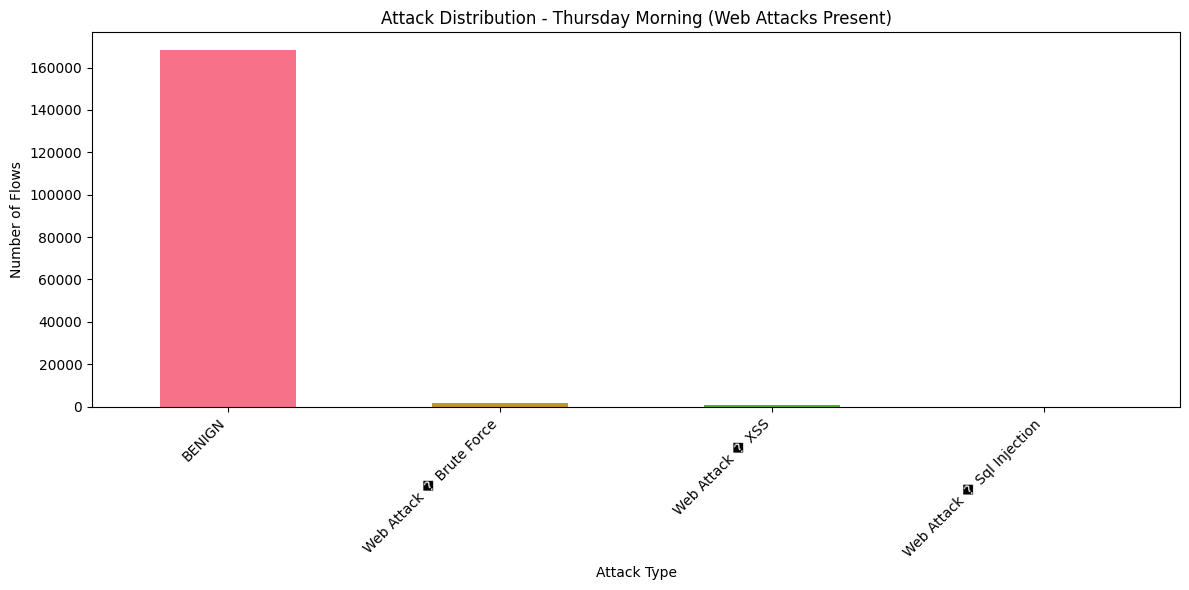

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df[' Label'].value_counts().plot(kind='bar', figsize=(12, 6), color=sns.color_palette('husl'))
plt.title('Attack Distribution - Thursday Morning (Web Attacks Present)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Flows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
print("\nTotal rows:", len(df))
print("Unique labels:", df[' Label'].unique())
print("\nSample benign row:")
print(df[df[' Label'] == 'BENIGN'].iloc[0])


Total rows: 170366
Unique labels: ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']

Sample benign row:
 Destination Port                      389
 Flow Duration                   113095465
 Total Fwd Packets                      48
 Total Backward Packets                 24
Total Length of Fwd Packets           9668
                                  ...     
Idle Mean                       13800000.0
 Idle Std                      4277541.062
 Idle Max                         16500000
 Idle Min                          6737603
 Label                              BENIGN
Name: 0, Length: 79, dtype: object
